In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Arquivo criado para **teste** de códigos para realização de jogadas, caso tenha um bom resultado, será implementado nos algoritmos de IA para realizar os testes das jogadas

#### **Ajustes Dataset Original**

#### **Criação de jogadas**

#### **Segregação Datasets Treino, Validação e Teste**

#### **Funções**

##### **Funções para classificação de jogadas**

In [9]:
# Função para verificar se as linhas são iguais
def verif_linhas(array):
    for linha in array:
        # Verificando se os elementos da linha são iguais exceto zero
        if (np.all(linha == 1) or np.all(linha == -1)) and np.any(linha != 0): 
           return str(linha[0]) # Retornando o valor do ganhador: 1 ou -1
       
    return False

# Função para verificar se as colunas são iguais          
def verif_colunas(array):
    # Transpondo o array para verificar colunas como se fossem linhas
    for coluna in array.T:  
        # Verificando se os elementos da coluna são iguais exceto zero
        if (np.all(coluna == 1) or np.all(coluna == -1)) and np.any(coluna != 0): 
            return str(coluna[0]) # Retornando o valor do ganhador: 1 ou -1
        
    return False

# Função para verificar se a diagonal principal são iguais
def verif_diag_principal(array):
    diagonal_principal = np.diag(array)  # Diagonal principal
    # Verificando se os elementos da diagonal principal são iguais exceto zero
    if (np.all(diagonal_principal == 1) or np.all(diagonal_principal == -1))  and np.all(diagonal_principal!=0) :
        return str(diagonal_principal[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

# Função para verificar se a diagonal secundária são iguais
def verif_diag_secundaria(array):
    diagonal_secundaria = np.diag(np.fliplr(array))  # Diagonal secundária (flipping array)
    # Verificando se os elementos da diagonal secundária são iguais exceto zero
    if (np.all(diagonal_secundaria == 1) or np.all(diagonal_secundaria==-1))  and np.all(diagonal_secundaria!=0): 
        return str(diagonal_secundaria[0]) # Retornando o valor do ganhador: 1 ou -1
    
    return False

def get_vencedor(lista_respostas):
    for valor in lista_respostas:
        # Transormando cada valor em uma string, verifica-se se o valor é numérico (1 ou -1)
        valor = str(valor)
        # if valor.isnumeric():
        #     # Condicional para determinar qual valor retorna
        if valor == "1":
            return "X"
        elif valor == "-1":
            return "O"

def status_jogo(jogada):
    # Conversão do array que está sendo usado como parâmetro em uma matriz de 3x3
    jogada = np.array(jogada).reshape(3,3)
    
    # Criando uma lista com os retornos das funções verificadoras de cada jogada, o resultado é um array de 4 elementos. Ex: [1,False,False,False]
    lista_resposta = list([verif_colunas(jogada), verif_linhas(jogada), verif_diag_principal(jogada), verif_diag_secundaria(jogada)])
    # Se algum dos elementos da lista for diferente de false, a função get_vencedor será chamada
    if any(lista_resposta):
        valor = get_vencedor(lista_resposta)
        return valor + " VENCEU!"
    # Condicional para verificar se os únicos valores preenchidos no tabuleiro são 1 e -1
    elif len(np.unique(jogada)) == 2 and 0 not in np.unique(jogada):
        return "EMPATE"
    else:
        return "AINDA TEM JOGO"

In [9]:
def get_tabuleiro(jogadas):
    # Função para imprimir o tabuleiro de Tic-Tac-Toe
    for i in range(0, 9, 3):
        linha = jogadas[i:i+3]
        print(' | '.join(linha))
        if i < 6:
            print("---------")  # Separador entre linhas

##### **Funções para plotagem do tabuleiro**

In [12]:
import matplotlib.pyplot as plt

def plot_board(board):
    fig, ax = plt.subplots()
    ax.set_xlim(0, 3)
    ax.set_ylim(0, 3)
    ax.text(-0.25, 2.5, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 1.5, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(-0.25, 0.5, '3', fontsize=42, ha='center', va='center', color='black')

    ax.text(0.5, 3.25, '1', fontsize=42, ha='center', va='center', color='black')
    ax.text(1.5, 3.25, '2', fontsize=42, ha='center', va='center', color='black')
    ax.text(2.5, 3.25, '3', fontsize=42, ha='center', va='center', color='black')

    plt.plot([1, 1], [0, 3], color='black', linewidth=2)
    plt.plot([2, 2], [0, 3], color='black', linewidth=2)
    plt.plot([0, 3], [1, 1], color='black', linewidth=2)
    plt.plot([0, 3], [2, 2], color='black', linewidth=2)

    for i in range(3):
        for j in range(3):
            mark = board[i][j]
            if mark == 1:
                plt.text(j + 0.5, 2.5 - i, 'X', fontsize=42, ha='center', va='center', color='black')
            elif mark == -1:
                plt.text(j + 0.5, 2.5 - i, 'O', fontsize=42, ha='center', va='center', color='black')

    status = status_jogo(board)
    plt.text(1.5, -0.5, 'Status: ' + status, fontsize=42, ha='center', va='center', color='black')

    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_aspect('equal')

    plt.show()


Tabuleiro 1:


IndexError: string index out of range

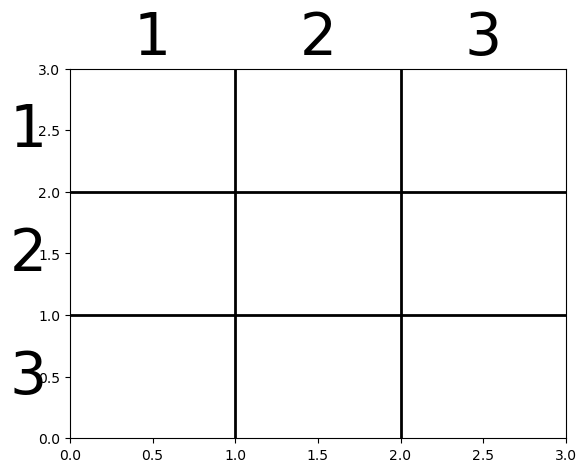

In [8]:
lista_tabuleiros = pd.read_csv("teste_vencedor_x.csv")
for index, tabuleiro in lista_tabuleiros.iterrows():
    tabuleiro = np.array(list(map(int, tabuleiro['Results'].split(';')[:-1])))
    print(f"Tabuleiro {index+1}:")
    plot_board(list(map(str, tabuleiro)))
    print(status_jogo(tabuleiro))
    print("\n")

##### **Funções para realização de jogadas**

In [10]:
def coleta_jogada():
    # Coletando os valores por meio de um input
    linha, coluna = input("Informe a linha e a coluna onde deseja incluir o x. Ex: [1,2]").split(",")
    
    # Convertendo os valores para inteiro
    return int(linha), int(coluna)


def ajuste_jogada(jogada,linha,coluna):
    # Subtraindo os valores das linhas ou colunas caso o valor seja maior que zero
    if linha != 0:
        linha -= 1

    if coluna != 0:
        coluna -= 1
        
    # print("Linha: {} Coluna: {}".format(linha,coluna))

    # Caso a posição informada pelo usuário não esteja preenchida, ele realiza a modificação
    if jogada[linha][coluna] != 0:
        print ("Já preenchido")
    else:
        jogada[linha][coluna] = 1
        print ("Jogada realizada")
        
    return jogada

Jogada realizada


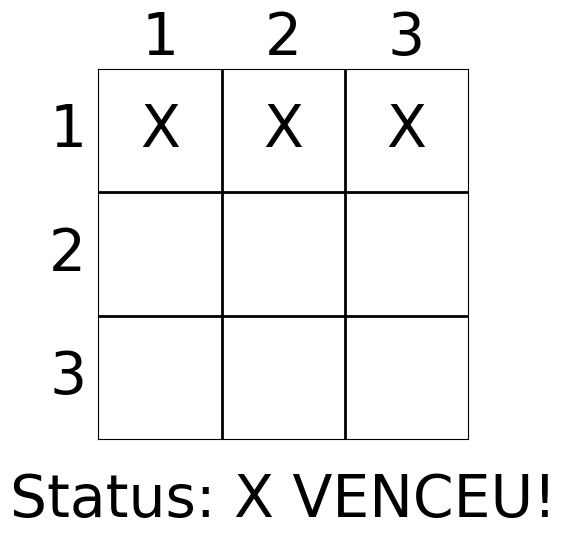

X VENCEU!



In [13]:
from IPython.display import clear_output

# Convertendo a lista de jogadas em um array 3x3
jogada = [0,0,0,0,0,0,0,0,0]
jogada = np.array(jogada).reshape(3,3)
plot_board(jogada)

finalizar_jogo = False

print("=====================================\n")

while not finalizar_jogo:
    clear_output(wait=True)
    # Coletando a jogada
    linha,coluna = coleta_jogada()
    
    # Realizando o ajuste da jogada a partir das posições de inserção informadas
    jogada = ajuste_jogada(jogada,linha,coluna)
    
    # Plotando o tabuleiro 
    # AQUI PRECISA DA FUNÇÃO BONITA PARA EXIBIR O TABULEIRO COM OS X E O

    plot_board(jogada)
    
    
    # Obtenção do status do jogo
    print(status_jogo(jogada))
    print("=====================================\n")
    
    # Caso haja um vencedor o loop será encerrado
    if status_jogo(jogada) != "AINDA TEM JOGO":
        finalizar_jogo = True